In [17]:
from jax import vmap, numpy as jnp
import matplotlib.pyplot as plt
from IPython.display import display

## Lemma 3.5 ($\mathbb E \exp U = 1$ implies small $\mu$)

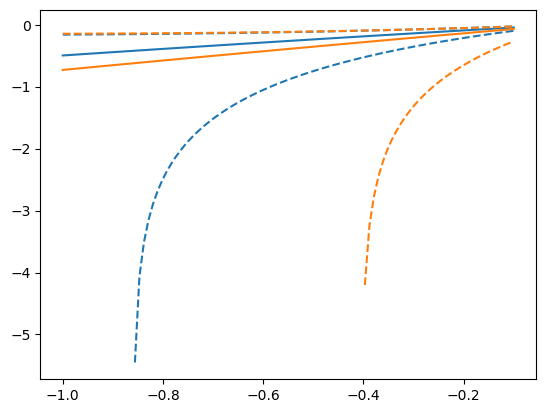

In [3]:
def p(a,b):
    #return (1 - jnp.exp(b)) / (jnp.exp(a) - jnp.exp(b))
    return (jnp.exp(-b) - 1) / (jnp.exp(a - b) - 1)

def mu(a,b):
    return a * p(a,b) + b * (1 - p(a,b))

def s2(a,b):
    return p(a,b) * (1 - p(a,b)) * (b - a)**2

def lower_bound(a,b):
    return jnp.log(1 - jnp.exp(b) * s2(a,b) / 2)

def upper_bound(a,b):
    return jnp.log(1 - jnp.exp(a) * s2(a,b) / 2)


a = jnp.linspace(-1, -.1, 101)
b = jnp.linspace(1.1, 2, 2)

outer = lambda fun: vmap(vmap(fun, (None, 0)), (0, None))

mus = outer(mu)(a,b)
lower = outer(lower_bound)(a,b)
upper = outer(upper_bound)(a,b)

for i in range(b.shape[0]):
    plt.plot(a, mus[:,i], label=f'b={b[i]}', color = 'C'+str(i))
    plt.plot(a, lower[:,i], linestyle='--', label=f'b={b[i]}', color = 'C'+str(i))
    plt.plot(a, upper[:,i], linestyle='--', label=f'b={b[i]}', color = 'C'+str(i))
plt.show()

In [6]:
(jnp.nan_to_num(lower, nan=-jnp.inf) < mus).all(), (mus < upper).all()

(Array(True, dtype=bool), Array(True, dtype=bool))

# Example for Theorem 3.2 (variance is not a good measure for convergence)

In [21]:
from sympy import *
from sympy.stats import Normal, E

x= Symbol("x")
s = Symbol("sigma", positive=True)
X = Normal("x", 0, s)
w = s * exp(-X**2/2*(1-1/s**2))

assert E(w * X, conds="none") == 0

# w*X is centered
var_weights = E(w ** 2 * X**2, conds="none")
display(var_weights.simplify())

sigma**4/(((2*sigma**2 - 1)/(sigma**2 - 1))**(3/2)*(sigma**2 - 1)**(3/2))